<a href="https://colab.research.google.com/github/haki-user/Data_Science/blob/main/titanic_dataset/kaggle_submission_score_0_42822_Aditya10_titanic_analysis_train%2Btest_DecisionTree_best_acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries and data

In [248]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

from google.colab import files

In [249]:
#load the dat from csv file to pandas DataFrame
df = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
df.head()
#df.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [250]:
#info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


# **Data Preprocesssing**

In [251]:
#missing values in each column
#df.isnull()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Handling the missing values:**

In [252]:
#drop the "Cabin" column from the DataFrame
df = df.drop(columns='Cabin', axis=1)
test_data = test_data.drop(columns='Cabin', axis=1) 

In [253]:
#replacing the missing values in "Age" column with it's mean value
df['Age'].fillna(df['Age'].mean(), inplace=True) #axis=column, inplace to change for all the cells
test_data['Age'].fillna(df['Age'].mean(), inplace=True)

In [254]:
#replacing the values in "Embarked" with most repeated value (because it is categorical)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Data Analysis**

In [255]:
#statistical measures about the data
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [256]:
#no of people survived
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Data Visualization**

In [257]:
#??????
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


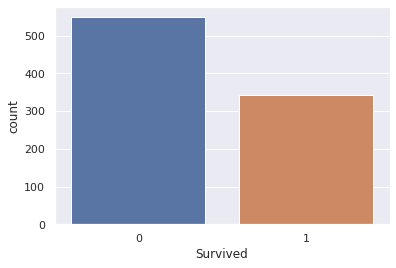

In [258]:
#count plot for "Survived" column
sns.countplot('Survived', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


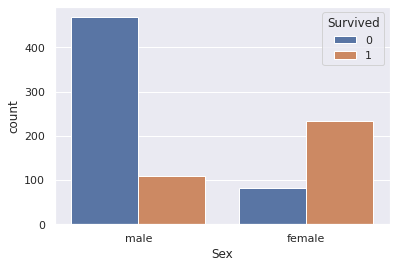

In [259]:
#survivors gender wise
df.loc[df['Sex']==0, 'Sex'] = "female"
df.loc[df['Sex']==1, 'Sex'] = "male"
sns.countplot('Sex', hue='Survived', data=df)

**Encoding the categorical columns**

In [260]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [261]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [262]:
#converting categorical columns
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
test_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


**Separating features and target**

In [263]:
X = df.drop(columns=['PassengerId','Name','Ticket','Survived'], axis=1)
X_test = test_data.drop(columns=['PassengerId','Name','Ticket'], axis=1)
#columns dropped because they contains all unique values & Survived column is separated
Y = df.Survived
print(X.head(),'\n',"_ "*40,'\n',Y.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         0
1       1    1  38.0      1      0  71.2833         1
2       3    1  26.0      0      0   7.9250         0
3       1    1  35.0      1      0  53.1000         0
4       3    0  35.0      0      0   8.0500         0 
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


**Splitting the data into training data and testing data**

In [264]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
#print(X.shape, X_train.shape, X_test.shape)

# **Model Training**

Logistic Regression:

In [265]:
#training model with training data
model = LogisticRegression()
model.fit(X, Y)

LogisticRegression()

**Model Evaluation**

Accuracy Score:

In [266]:
#accuracy on training data
X_train_prediction = model.predict(X)
training_data_accuracy = accuracy_score(Y, X_train_prediction)
training_data_accuracy


0.8047138047138047

In [267]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [268]:
X_test.info

<bound method DataFrame.info of      Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
0         3    1  34.500000      0      0    7.8292         2
1         3    0  47.000000      1      0    7.0000         0
2         2    1  62.000000      0      0    9.6875         2
3         3    1  27.000000      0      0    8.6625         0
4         3    0  22.000000      1      1   12.2875         0
..      ...  ...        ...    ...    ...       ...       ...
413       3    1  29.699118      0      0    8.0500         0
414       1    0  39.000000      0      0  108.9000         1
415       3    1  38.500000      0      0    7.2500         0
416       3    1  29.699118      0      0    8.0500         0
417       3    1  29.699118      1      1   22.3583         1

[418 rows x 7 columns]>

In [272]:
X_test['Fare'] = X_test['Fare'].fillna(0)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [270]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(, X_test_prediction)
test_data_accuracy

SyntaxError: ignored

In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X, Y)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X, Y) * 100, 2)
acc_svc

In [273]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, Y)
Y_pred = decision_tree.predict(X_test)
#acc_decision_tree = round(decision_tree.score(X, Y) * 100, 2)
#acc_decision_tree
np.savetxt("pred.csv",Y_pred)
dfp = pd.DataFrame(test_data['PassengerId'])
dfp['Survived'] = pd.DataFrame(Y_pred, columns=['Survived'])
dfp.to_csv("titanic_DT_model_pred.csv", index=False)
files.download("titanic_DT_model_pred.csv")
dfp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0
